### **Phần 1: Phân tích dữ liệu 11 nghìn diễn viên**

[Phần 1](https://www.youtube.com/watch?v=nUJcue1dQdc&feature=youtu.be&fbclid=IwAR1kCeJbTRZw3XY0e45Z4UmYkzQCCLmUe7mbVbORo5sMlA917mNYd1ovEzk)

In [ ]:
!git clone https://github.com/conanak99/jav-py.git


Cloning into 'jav-py'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 3), reused 3 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), done.


3. import các thư viện

pandas as pd  //Thư chứa nhiều công cụ để đọc xử lý dữ liệu

seaborn as sns //để built vẽ biểu đồ cho đẹp hơn

matplotlib.pyplot as plt //vẽ biểu đồ cơ bản

In [ ]:
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')



4. Đọc và hiển thi dữ liệu
head() lấy 5 dòng đầu ra xem ntn

In [ ]:
actress = pd.read_json("jav-py/acctress.json")
actress.head()

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都


 Lấy toàn bộ thông tin
 
//birthday, data chỉ có 4031/11000 có ngày tháng năm sinh => data ko hoàn hảo

In [ ]:
actress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11186 non-null  int64  
 1   name         11186 non-null  object 
 2   japanName    11186 non-null  object 
 3   hiragana     11186 non-null  object 
 4   bust         6456 non-null   float64
 5   waist        6436 non-null   float64
 6   hip          6428 non-null   float64
 7   height       5012 non-null   float64
 8   birthday     4031 non-null   object 
 9   blood_type   3171 non-null   object 
 10  hobby        3730 non-null   object 
 11  prefectures  4471 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.0+ MB



Cách 1: Xóa những người ko có birthday => mất nhiều data

Cách 2: Tính độ tuổi ra, nếu ai ko có add vào độ tuổi trung bình

5. Tính toán, xử lý, vẽ biểu đồ độ tuổi

//đổi birthday(kiểu object) -> data time(kiểu datetime để sử dụng hàm DatetimeIndex dưới để lấy ra năm)

In [ ]:
actress['birthday'] = pd.to_datetime(actress['birthday'], yearfirst=True)
actress['age'] = 2020 - pd.DatetimeIndex(actress['birthday']).year

In [ ]:
actress.head()

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None,40.0
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都,42.0
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県,38.0
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都,37.0
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都,50.0


Tìm diễn viên trẻ tuổi nhất

In [ ]:
actress.age.min()

19.0

In [ ]:
actress[actress['age'] == actress.age.min()] 

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
9826,1059504,Maki Izuna,槙いずな,まきいずな,80.0,55.0,84.0,148.0,2001-01-27,None,読書,東京都,19.0
9933,1061822,Takeda Erena,武田エレナ,たけだえれな,NaN,NaN,NaN,NaN,2001-08-08,None,None,静岡県,19.0


![maki](https://cdn.pose.vn/wp-content/uploads/2020/10/16035232220291442241495.jpg)

Xem thống kê của các cột trong bảng

In [ ]:
actress.describe()

,id,bust,waist,hip,height,age
count,1.118600e+04,6456.000000,6436.000000,6428.000000,5012.000000,4031.000000
mean,4.852872e+05,87.094253,58.898229,86.289203,158.713148,35.704788
std,5.076289e+05,6.155405,3.176163,3.829804,5.814022,7.262923
min,3.000000e+00,51.000000,48.000000,54.000000,134.000000,19.000000
25%,7.189000e+03,83.000000,58.000000,84.000000,155.000000,31.000000
50%,2.678500e+04,86.000000,58.000000,86.000000,158.000000,35.000000
75%,1.026770e+06,90.000000,60.000000,88.000000,163.000000,40.000000
max,1.063061e+06,153.000000,100.000000,125.000000,182.000000,65.000000


Thay đổi các giá trị tuổi NULL thành tuổi trung bình là 35

=> Cột age đã đủ 11186 bản ghi

In [ ]:
actress['age'] = actress.age.fillna(35)
actress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           11186 non-null  int64         
 1   name         11186 non-null  object        
 2   japanName    11186 non-null  object        
 3   hiragana     11186 non-null  object        
 4   bust         6456 non-null   float64       
 5   waist        6436 non-null   float64       
 6   hip          6428 non-null   float64       
 7   height       5012 non-null   float64       
 8   birthday     4031 non-null   datetime64[ns]
 9   blood_type   3171 non-null   object        
 10  hobby        3730 non-null   object        
 11  prefectures  4471 non-null   object        
 12  age          11186 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 1.1+ MB


Vẽ biểu đồ xem thử độ tuổi

<Figure size 1080x720 with 0 Axes>

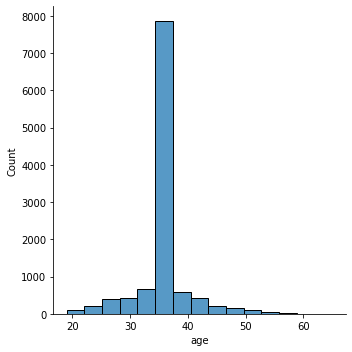

In [ ]:
plt.figure(figsize=(15,10))
sns.displot(actress.age)


=> Data ko hợp lý do mình đã chỉnh hết những người Null age thành 35

=> Tính lại tuổi, để age về lại cũ

In [ ]:
actress['birthday'] = pd.to_datetime(actress['birthday'], yearfirst=True)
actress['age'] = 2020 - pd.DatetimeIndex(actress['birthday']).year
actress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           11186 non-null  int64         
 1   name         11186 non-null  object        
 2   japanName    11186 non-null  object        
 3   hiragana     11186 non-null  object        
 4   bust         6456 non-null   float64       
 5   waist        6436 non-null   float64       
 6   hip          6428 non-null   float64       
 7   height       5012 non-null   float64       
 8   birthday     4031 non-null   datetime64[ns]
 9   blood_type   3171 non-null   object        
 10  hobby        3730 non-null   object        
 11  prefectures  4471 non-null   object        
 12  age          4031 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 1.1+ MB


Vẽ lại cột tuổi, bỏ những thằng NULL

<Figure size 1080x720 with 0 Axes>

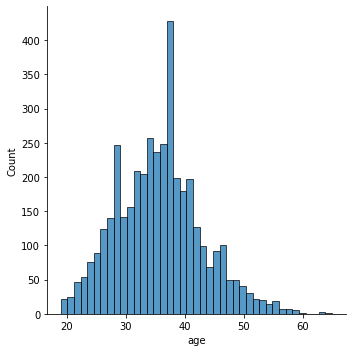

In [ ]:
plt.figure(figsize=(15,10))
sns.displot(actress.age.dropna())

In [ ]:
actress.describe()

,id,bust,waist,hip,height,age
count,1.118600e+04,6456.000000,6436.000000,6428.000000,5012.000000,4031.000000
mean,4.852872e+05,87.094253,58.898229,86.289203,158.713148,35.704788
std,5.076289e+05,6.155405,3.176163,3.829804,5.814022,7.262923
min,3.000000e+00,51.000000,48.000000,54.000000,134.000000,19.000000
25%,7.189000e+03,83.000000,58.000000,84.000000,155.000000,31.000000
50%,2.678500e+04,86.000000,58.000000,86.000000,158.000000,35.000000
75%,1.026770e+06,90.000000,60.000000,88.000000,163.000000,40.000000
max,1.063061e+06,153.000000,100.000000,125.000000,182.000000,65.000000


lấy vòng 1 hiển thị nó dưới dạng biểu đồ size 15,6. Số lượt cột =50

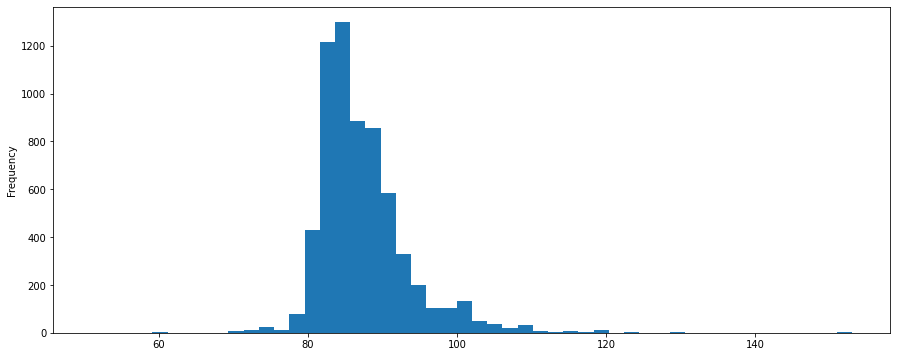

In [ ]:
actress.bust.plot.hist(figsize=(15,6), bins=50)

Tìm diễn viên theo tên

Tìm tên trong actress, chuyển qua string, tìm vs key = Mikami

In [ ]:
actress[actress.name.str.contains("Mikami")]

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
94,1117,Mikami Sati,三上さち,みかみさち,NaN,NaN,NaN,NaN,NaT,None,None,None,NaN
95,1118,Mikami Syun,三上しゅん,みかみしゅん,NaN,NaN,NaN,NaN,NaT,None,None,None,NaN
96,1119,Mikami Ran,三上蘭,みかみらん,84.0,59.0,86.0,NaN,1982-12-16,O,None,None,38.0
625,13127,Mikami Runa,美神ルナ,みかみるな,88.0,58.0,85.0,163.0,1984-06-01,O,ダンス、旅行、ダイビング、英会話,東京都,36.0
677,13586,Mikami Yuuki,三上夕希,みかみゆうき,86.0,65.0,89.0,168.0,NaT,None,None,None,NaN
1762,20124,Mikami Seri,美上セリ,みかみせり,83.0,58.0,82.0,160.0,1987-03-15,B,ショッピング、ダーツ,東京都,33.0
2258,22162,Mikami Nana,美神奈々,みかみなな,NaN,NaN,NaN,NaN,NaT,None,None,None,NaN
3207,26885,Mikami Sihori,三神しほり,みかみしほり,NaN,NaN,NaN,NaN,NaT,None,None,,NaN
3305,27668,Mikami Rion,三上リオン,みかみりおん,88.0,59.0,82.0,147.0,NaT,None,,,NaN
3391,27889,Mikami Seira,美神聖良,みかみせいら,NaN,NaN,NaN,NaN,NaT,None,None,,NaN


![Mikami](https://upload.wikimedia.org/wikipedia/commons/2/26/Yua_Mikami_on_Taiwan_Pavilion_stage%2C_Taipei_Game_Show_20180127c.jpg)

Xem sở thích (bị bất nhiều)

Vẽ thành 1 WordCloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
hobby_df = actress[actress.hobby.notnull()]

In [ ]:
hobby_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3730 entries, 0 to 11185
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           3730 non-null   int64         
 1   name         3730 non-null   object        
 2   japanName    3730 non-null   object        
 3   hiragana     3730 non-null   object        
 4   bust         3523 non-null   float64       
 5   waist        3539 non-null   float64       
 6   hip          3539 non-null   float64       
 7   height       3045 non-null   float64       
 8   birthday     3056 non-null   datetime64[ns]
 9   blood_type   2610 non-null   object        
 10  hobby        3730 non-null   object        
 11  prefectures  2665 non-null   object        
 12  age          3056 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 408.0+ KB


In [ ]:
hobby_txt =''.join(hobby_df['hobby'])

In [ ]:
wordclound = WordCloud(font_path='jav-py/jp.otf', max_words=200, max_font_size=40).generate(hobby_txt)

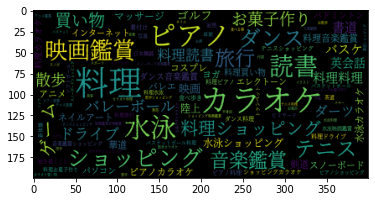

In [ ]:
plt.imshow(wordclound)
plt.show()

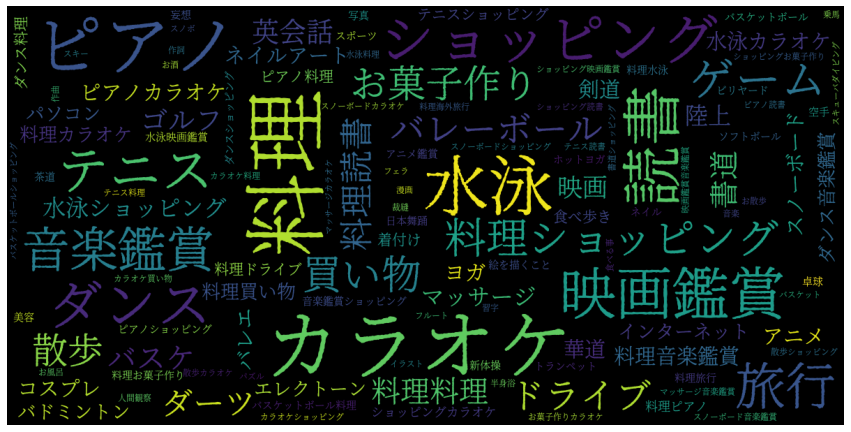

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
wordclound = WordCloud(font_path='jav-py/jp.otf', max_words=200, max_font_size=40, scale=3).generate(hobby_txt)
plt.imshow(wordclound)
plt.axis('off')
plt.show()

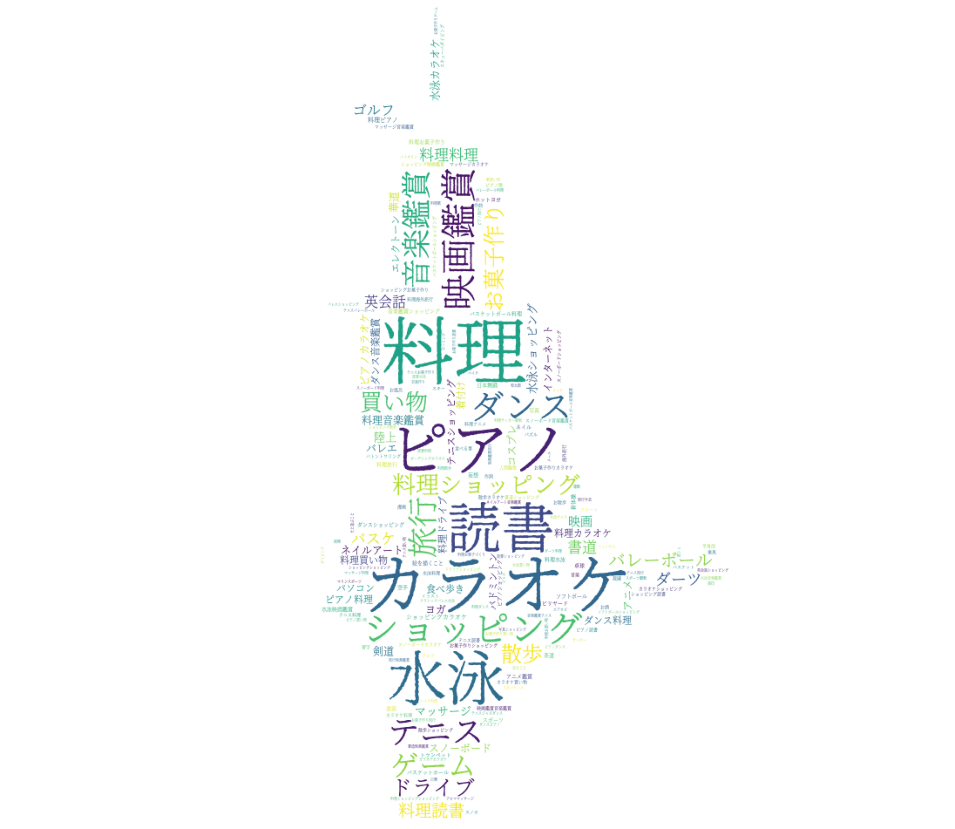

In [ ]:
import numpy as np
from PIL import Image

mask = np.array(Image.open("jav-py/mask_black.png"))

wordclound = WordCloud(font_path='jav-py/jp.otf', max_words=200, background_color="white", mask=mask).generate(hobby_txt)

plt.figure(figsize=(30,15))
plt.imshow(wordclound)
plt.axis('off')
plt.show()

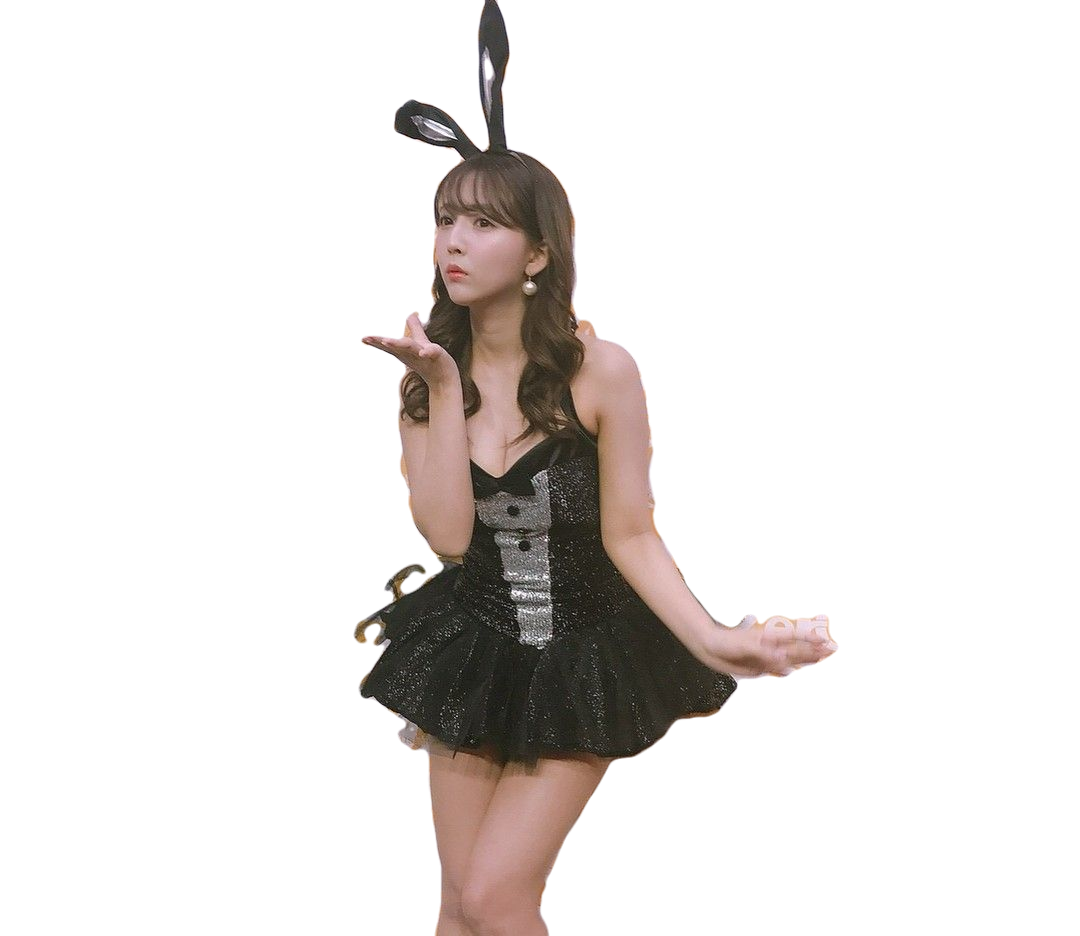


### **Phần 2: Xây dựng hệ thống AI giới thiệu diễn viên**

[Link phần 2](https://colab.research.google.com/drive/1Ll4JFMmBR5jzBFecrpGv-5NPIRDxmbjC#scrollTo=CAxa4-gqU18n&line=1&uniqifier=1)





In [ ]:
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from sklearn.cluster import KMeans #thuật toán để sd
from sklearn import metrics #so sách đánh giá các giá trị
import warnings #filter các warning
warnings.filterwarnings('ignore')

KMeans: thuật toán gom cụm trong data scient. Nơi sử dụng khi kb nhãn, lable của dữ liệu => để phân dlieu vào các cụm khác nhau, mỗi cụm có 1 tính chất giống nhau

In [ ]:
actress = pd.read_json("jav-py/acctress.json")
actress.head()

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都


In [ ]:
df = actress[['bust', 'waist', 'hip', 'height', 'blood_type']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        6456 non-null   float64
 1   waist       6436 non-null   float64
 2   hip         6428 non-null   float64
 3   height      5012 non-null   float64
 4   blood_type  3171 non-null   object 
dtypes: float64(4), object(1)
memory usage: 437.1+ KB


In [ ]:
df = df.dropna() #bo di cac dong rong

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        2678 non-null   float64
 1   waist       2678 non-null   float64
 2   hip         2678 non-null   float64
 3   height      2678 non-null   float64
 4   blood_type  2678 non-null   object 
dtypes: float64(4), object(1)
memory usage: 125.5+ KB


In [ ]:
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,A
2,96.0,55.0,85.0,168.0,B
3,80.0,59.0,82.0,162.0,O
4,82.0,55.0,89.0,162.0,A
6,85.0,60.0,88.0,165.0,A


In [ ]:
df.blood_type.value_counts() #xem bn loai blood

A     1100
O      939
B      422
AB     217
Name: blood_type, dtype: int64

In [ ]:
mapper = {'O' : 0, 'A':1, 'B':2, 'AB':3} #chuyen nhom mau sang dang so for ez to use Kmeans
df['blood_type'] = df['blood_type'].map(mapper)
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,1
2,96.0,55.0,85.0,168.0,2
3,80.0,59.0,82.0,162.0,0
4,82.0,55.0,89.0,162.0,1
6,85.0,60.0,88.0,165.0,1


In [ ]:
actress_np = df.to_numpy() #chuyen data frame => mang
actress_np

array([[ 90.,  58.,  86., 157.,   1.],
       [ 96.,  55.,  85., 168.,   2.],
       [ 80.,  59.,  82., 162.,   0.],
       ...,
       [ 83.,  58.,  85., 165.,   0.],
       [ 88.,  58.,  87., 153.,   0.],
       [ 88.,  59.,  86., 161.,   2.]])

Bên trên không biết data đó sẽ gom thành bao nhiêu cụm 

=> chọn 1 con số để nó join thành số cụm đó: VD: chọn 5 cụm

In [ ]:
k_mean_5 = KMeans(n_clusters=5) #cho thành 5 cụm: 0,1,2,3,4
k_mean_5.fit(actress_np)        #đưa data vào kmean để chạy
label_5 = k_mean_5.labels_      #biến để xem kết quả các cụm
label_5

array([0, 4, 3, ..., 4, 0, 0], dtype=int32)

Để biết kết quả mình phân cụm có tốt hay không. Có 2 cách đánh giá: silhouette_score và calinski_harabasz_score

In [ ]:
metrics.silhouette_score(actress_np, label_5, metric='euclidean')

0.23664099147795253

In [ ]:
metrics.calinski_harabasz_score(actress_np, label_5)

1065.3871120369677

TH phân thành 10 cụm

In [ ]:
k_mean_10 = KMeans(n_clusters=10) #cho thành 10 cụm
k_mean_10.fit(actress_np)        #đưa data vào kmean để chạy, biết được kmean
label_10 = k_mean_10.labels_      #biến để xem kết quả các cụm
label_10

array([1, 2, 4, ..., 4, 9, 1], dtype=int32)

In [ ]:
metrics.silhouette_score(actress_np, label_10, metric='euclidean')


0.19620853897057416

In [ ]:
metrics.calinski_harabasz_score(actress_np, label_10)

768.8979724826268

=> Cụm 5 tốt hơn cụm 10

=> Sử dụng phương pháp để tìm ra điểm tốt nhất

In [ ]:
sum_distances = []
K = range(1,15)
for k in K:
  k_mean = KMeans(n_clusters=k)
  k_mean.fit(actress_np)
  sum_distances.append(k_mean.inertia_) #đưa kết quả vào mảng, chỉ đưa cái inertia_ (tổng số kc giữa điểm chính giữa -> dl xung quanh)
 

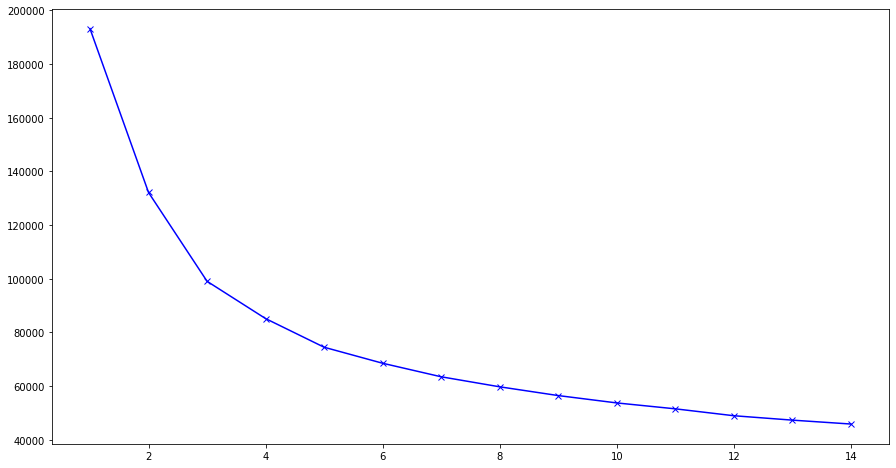

In [ ]:
plt.plot(K, sum_distances, 'bx-')     #sd để vẽ sum_distances
plt.show()

Tìm điểm tối ưu: Điểm củi trỏ-điểm ko thay đổi quá nhiều => Điểm 3 - củi chỏ cánh tay :D ??

In [79]:
k_mean_3 = KMeans(n_clusters=3)     #cho thành 3cụm
model = k_mean_3.fit(actress_np)    #đưa data vào kmean để chạy, biết được kmean
result = k_mean_3.labels_           #biến để xem kết quả các cụm
result

array([1, 0, 2, ..., 2, 1, 2], dtype=int32)

In [80]:
metrics.silhouette_score(actress_np, result, metric='euclidean')

0.3043234849568844

In [ ]:
metrics.calinski_harabasz_score(actress_np, result)

1271.406189608148

In [ ]:
df.head() #dataset của mình trước

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,1
2,96.0,55.0,85.0,168.0,2
3,80.0,59.0,82.0,162.0,0
4,82.0,55.0,89.0,162.0,1
6,85.0,60.0,88.0,165.0,1


Vẽ độ phân tán của data(Khi đã chia làm 3 cụm ở trên) so với điểm trung tâm

Ở đấy chỉ vẽ data của cột 1 và cột 4

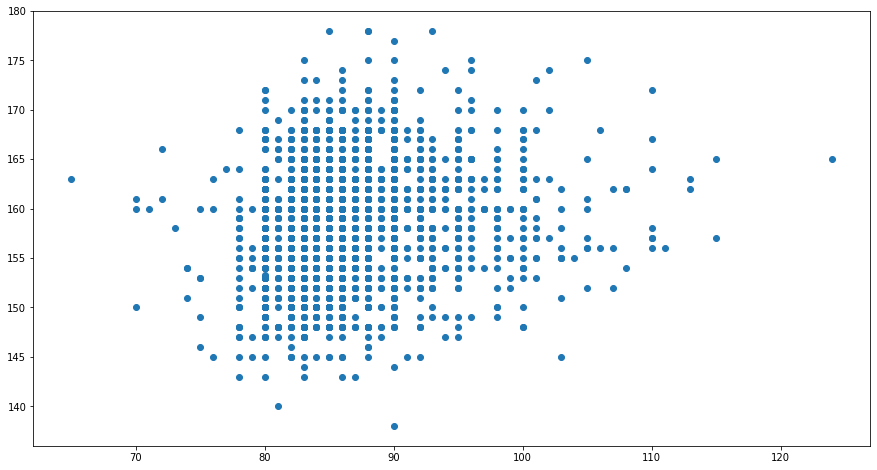

In [ ]:
plt.scatter(actress_np[:,0],actress_np[:,3]) #đưa vào 2 giá trị đại diện là cột đầu(bust) và cột 2(height)
plt.show()

Vẽ để xem nó phân cụm như thế nào bằng result để lấy cột 1 và 4 ở mỗi cụm

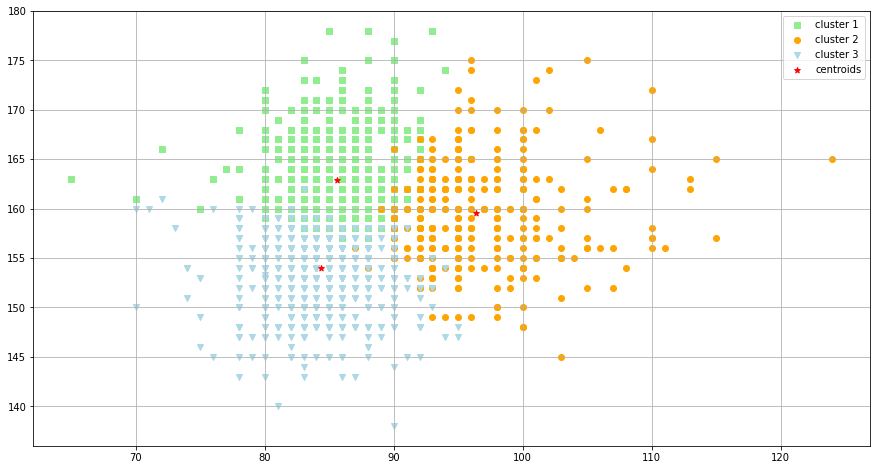

In [ ]:
#Hiển thị cluster 1
plt.scatter(
    actress_np[result == 0,0], actress_np[result == 0,3],
    c='lightgreen',
    marker='s', 
    label='cluster 1'
)

#Hiển thị cluster 2
plt.scatter(
    actress_np[result == 1,0], actress_np[result == 1,3],
    c='orange',
    marker='o', 
    label='cluster 2'
)

#Hiển thị cluster 3
plt.scatter(
    actress_np[result == 2,0], actress_np[result == 2,3],
    c='lightblue', 
    marker='v',
    label='cluster 3'
)

#Hiển thị điểm trung tâm (của chiều rộng, chiều cao )
plt.scatter(
    model.cluster_centers_[:,0], model.cluster_centers_[:,3],
    c='red',
    marker='*', 
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid() #tạo khung caro
plt.show()

=> Hình trên

Với mỗi cluster: Điểm trung tâm có thể bao quát tối ưu được các điểm xung quanh
> Số lương cluster = 3 là tối ưu cho dataset của mình

## **Bắt đầu làm hệ thống gợi ý**: 

Input: vong1, 2, 3, chieu cao, nhom mau

-> Tính thuộc vào cụm nào

-> Tính ramdom(10) diễn viên trong cluster đó

B1: Lấy dataset tên dfl


In [72]:
df1 = actress[['id','bust', 'waist', 'hip', 'height', 'blood_type']]
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 146.5+ KB


In [74]:
df2 = actress[['id','name', 'japanName']]
df2.head()

,id,name,japanName
0,3,Kitagawa Yui,北川ゆい
1,4,Akira,Akira
2,6,Cocolo,COCOLO
3,8,Saiko,Saiko
4,11,Aida Momo,あいだもも


Sẽ gộp 2 dataframe 1,2 lại dựa vào Id gọi là **lookup**. Mỗi lần nó chạy sẽ vô đây để lấy dữa liệu ra

In [75]:
lookup = df1.merge(df2, on='id', how='left')
lookup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 0 to 2677
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
 6   name        2678 non-null   object 
 7   japanName   2678 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 188.3+ KB


In [76]:
lookup['cluster'] = result #thêm cột cluster là chỉ cố cluster mỗi hàng thuộc về
lookup.head()


,id,bust,waist,hip,height,blood_type,name,japanName,cluster
0,4,90.0,58.0,86.0,157.0,A,Akira,Akira,2
1,6,96.0,55.0,85.0,168.0,B,Cocolo,COCOLO,1
2,8,80.0,59.0,82.0,162.0,O,Saiko,Saiko,0
3,11,82.0,55.0,89.0,162.0,A,Aida Momo,あいだもも,0
4,17,85.0,60.0,88.0,165.0,A,Aduki Miyu,あづき美由,0


In [92]:
#viet function
#actress_np: bảng df(bust	waist	hip	height	blood_type) + bỏ đi các NULL + đổi định dạng blood_type + chuyển từ bảng => mảng
# model = k_mean_3.fit(actress_np)

def recommend(model, vong1, vong2, vong3, chieu_cao, nhom_mau):
  arr = np.array([[vong1, vong2, vong3, chieu_cao, nhom_mau]]) #chuyển tất cả dlieu thành numpy.array(model, mô hình dli chỉ nhận dạng đó)
  pred = model.predict(arr)                                         #giá trị cluster trả về từ model
  return lookup[lookup['cluster'] == pred[0]].sample(10)            #trả về trong lookup có cluster = cluster model tìm được tìm thấy, thấy VD 20 cái đầu

In [97]:
vong1 = 86
vong2 = 55
vong3 = 90
chieu_cao = 157
nhom_mau = 0 #mã hóa nhóm máu O bên trên là 0
recommend(model, vong1, vong2, vong3, chieu_cao, nhom_mau)

,id,bust,waist,hip,height,blood_type,name,japanName,cluster
1264,2913,92.0,60.0,89.0,158.0,AB,Suenaga Ami,末永亜美,1
311,14495,88.0,60.0,98.0,154.0,A,Oosawa Yuka,晶エリー（新井エリー、大沢佑香）,1
1853,414,95.0,60.0,90.0,157.0,O,Okuda Yui,奥田唯,1
66,10808,110.0,60.0,90.0,157.0,A,Gotou Syouko,後藤聖子,1
2081,4681,95.0,60.0,90.0,153.0,A,Yamasaki Moe,山咲萌,1
2374,670,92.0,60.0,88.0,160.0,A,Miyasita Maki,宮下真紀,1
518,17724,98.0,60.0,98.0,164.0,A,Siraisi Miku,白石みく,1
1569,1012598,110.0,60.0,88.0,156.0,A,Sakura Yuu,さくら悠,1
764,2093,101.0,58.0,88.0,157.0,O,Ooura Anna,大浦あんな,1
2547,8432,100.0,60.0,91.0,154.0,A,Maeda Yuuka,前田優香,1
